# Trees and parks in Chicago

[David Rodriguez-Mateos](mailto:pirio@bib.uc3m.es)

Answer to the __M4: Discussion Forum 2:Challenge yourself to come up with some measurable questions of your own for the trees data. Share your questions and how you answered them with code.__

## Reason:

Starting from no idea about Chicago, and pretending not to read any other messages on the forum before, I made some initial statements.

The original file contains data about planted trees in Chicago.

One of the columns is "ward". Ward is the name of the administrative location areas in the city.

Each row contains the exact location of a set of trees that were planted.

Nevertheless, there are some rows that contains references about a set of trees planted in a place. All these rows have an empty value within "ward".

There is another adjacent column named "source". Most of the rows containing an empty value for "ward" have a "parks" value for "source".

So, I pretended to answer some of these questions:

1. Which parks received a largest amount of planted trees?
   
- Are there a relevant small set of parks receiving most of the trees? What is the ratio?

2. Are most, if not all, this raws related to trees planted in parks? It means:

- Is there any official parks list source?
   
- Can we associate each park with a ward, if possible

- Can we compare the tl parks list with the official parks list?

   
3 . What is the ratio of trees planted in parks, compared to trees planted outside parks?
  
- Can we recalculate the number of trees within each ward
   
- Can compare the real number of trees with each ward, and compare the number of trees inside and outside a park.

___________________________________________________________

Let's open the dataset, with a short name, "tl".

We are going to keep all the empty cells as is, instead of using "NaN" as a value.

In [1]:
import pandas as pd

In [2]:
tl = pd.read_csv('https://raw.githubusercontent.com/palewire/chicago-trees-analysis/main/output/trees.csv', keep_default_na=False)

In [3]:
tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33798 entries, 0 to 33797
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       33798 non-null  object
 1   date     33798 non-null  object
 2   address  33798 non-null  object
 3   ward     33798 non-null  object
 4   trees    33798 non-null  int64 
 5   source   33798 non-null  object
 6   year     33798 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [4]:
tl.head(5)

,id,date,address,ward,trees,source,year
0,201100837,2011-04-14 12:00:00,7777 W IRVING PARK RD,36,2,dss,2011.0
1,201100839,2011-04-14 12:00:00,5152 S ARTESIAN AVE,14,1,dss,2011.0
2,201100841,2011-04-14 12:00:00,3520 S ARCHER AVE,12,1,dss,2011.0
3,201100840,2011-04-14 12:00:00,4118 S MAPLEWOOD AVE,12,1,dss,2011.0
4,201101968,2011-04-21 12:00:00,3663 S WABASH AVE,3,1,dss,2011.0


# Question 1. Parks and trees
__Are most, if not all, the raws with `source = 'parks'` related to trees planted in parks?__

## Question 1.1.

How many rows includes a __source = 'parks'__?

Let's filter when 'source' == 'parks'.
Keep it as a dataset call __pat__ (for 'parks and trees')

In [5]:
pat = tl[tl['source'] == 'parks']

How many rows are the 'parks' subset? (total amount and percentage rate over the whole tl set.

In [6]:
len(pat)

875

Only a few! But how many trees were planted there?

In [7]:
pat['trees'].sum()

36437

__Statement__: 36437 trees were planted in parks.

And what is the rate of trees within parks over the total number of planted trees in Chicago?

In [8]:
tl['trees'].sum()

76940

In [9]:
pat['trees'].sum() / tl['trees'].sum() * 100

47.35768131011178

__Statement__: almost half (47,35%) of the trees were planted in "parks"!!

And how many different "address" are related to a "park"?

- Filter all the rows with __source == parks__
- Group by 'address'
- Sum the number of trees with a same _park_ address

In [10]:
parks_and_trees = tl[tl['source'] == 'parks'].groupby('address').sum('trees').reset_index()

In [11]:
pat = parks_and_trees 

In [12]:
len(pat)

446

__Statement__: there are 446 'possible' parks.

## Question 1.2.

Are there some parks with a higher sum of planted trees? Are they creating a relevant rate?

Order the park by the number of tries, in a descending order (`ascending=False`)

In [13]:
pato = pat.sort_values('trees', ascending=False)

Let's try with a lower number of parks, to see if there is some relevant value.

In [14]:
patop = pato.head(20)

In [15]:
patop['trees'].sum() / pato['trees'].sum() * 100

53.297472349534814

In [16]:
len(patop) / len(pato) * 100

4.484304932735426

__Statement__: _More than_ half (50%) of the planted _tries_ in parks are in only 20 parks, around _1/20th_ (4,48%) of the _parks_.

__Question__: which parks received the top 20 most planted sum of trees?

Additional tip: we recreate the table index (with __.reset_index()__, which means that the index column is not the "index" field anymore, but a new "index" column. So, this new column shows the position rank for each park, considering its number of planted trees.

Keep in mind that we ordered the table before, from top to bottom.


In [17]:
patop.reset_index()

,index,address,trees
0,234,Lincoln,3508
1,58,Burnham,1912
2,130,Garfield,1854
3,182,Humboldt,1752
4,144,Grant,1582
5,418,"Washington, George",1294
6,250,Marquette,1242
7,101,Douglas,1110
8,261,McKinley,795
9,64,Calumet,750


__Statement__: 20 parks received more than half of the planted trees.

__Question__: might there be some parks that have hardly planted trees? How these trees were distributed?

To have a quick look about how planted trees are distributed into parks:

- we can use the function .describe, which offers some basic descriptive statistics.
- and we add a function .round() to shorten the number of decimals, so that results were more readable (mostly for not used readers).

In [18]:
pato.describe().round(1)

,trees
count,446.0
mean,81.7
std,262.6
min,1.0
25%,9.0
50%,24.5
75%,59.0
max,3508.0


From a quick review:

- The maximum number of trees planted in a park is 3508.0 (Lincoln).
- But there are some parks with only 1 planted tree! So:

In [19]:
singletree = pato[pato['trees'] == 1 ]

In [20]:
len(singletree)

20

In [21]:
len(singletree)

20

Only a few 20 parks have only 1 planted tree!! Which parks are?

In [22]:
singletree

,address,trees
51,Bromann,1
403,Unioin,1
82,Coliseum,1
85,Cornell,1
196,Juniper,1
284,Ninebark,1
175,Hornbeam,1
378,Spikings Farm,1
422,Weisman,1
312,Park 542,1


__Statement__: a quarter (25%) of the parks received only 9 planted trees, or less. Why?

Are these parks trees very well conserved? Or didn't these parks reserve enough attention? (Remaining).

__Question__: on the contrary, what are the most planted tree parks?

We already found that the top 20 parks contained more than half of the trees. But how could we found it in a more standardized way?

Possible answer: .describe shows some other statistical results. Let's review again.

In [23]:
pato.describe().round(1)

,trees
count,446.0
mean,81.7
std,262.6
min,1.0
25%,9.0
50%,24.5
75%,59.0
max,3508.0


75% of the parks have a maximum of 59 planted trees. So, the remaining 25% had more than this figure:

In [24]:
top25parks = pato[pato['trees'] > 59]

In [25]:
top25parks.sort_values(by=['trees'], ascending = False)

,address,trees
234,Lincoln,3508
58,Burnham,1912
130,Garfield,1854
182,Humboldt,1752
144,Grant,1582
...,...,...
13,Armour Square,62
73,Chopin,62
257,McGuane,61
374,"Smith, Joseph H.",60


Something else: 

- mean	81.7- 
std	262.

If parks trees distribution were "normal", that would mean that:
- around 2/3 of the parks would be in a range of
    - minimum: -262.6 + mean (which is not possible).
    - maximum: +262.6 + mean = 343.3
- ... whereas 1/6 of the parks would have a lower number than the minimum value of the range...
- ... and 1/6 of the parks would have an __upper__ number of trees __than the maximum__ of this range.

So, how many parks are over this upper number? (even if this distribution was not "normal")6

In [26]:
supertop = pato[pato['trees'] > 343]

In [27]:
len(supertop)

14

Statement: there are 14 __supertop__ parks...

In [28]:
supertop

,address,trees
234,Lincoln,3508
58,Burnham,1912
130,Garfield,1854
182,Humboldt,1752
144,Grant,1582
418,"Washington, George",1294
250,Marquette,1242
101,Douglas,1110
261,McKinley,795
64,Calumet,750


...that contained, together:

In [29]:
supertop['trees'].sum()

17902

In [30]:
supertop['trees'].sum() / pato['trees'].sum() * 100

49.13137744600269

__14 supertop parks__ contained __half__ (49,1%, 17902) of the __planted trees__.

# Question 2. Combine data with an official parks list.

I had not any previous knowledge neither from Chicago nor its areas or parks. Nevertheless, after watching the tv news about it, I realized Chicago was divided into "wards", which is an electoral division.

The original __tl__ dataset do have any information about wards... but when 'source' == 'parks', there was no further information about the ward each park is belonging to.

So, new questions kept to my mind:

- How many wards are in Chicago?
- Is it possible to link each park with a specific ward? Which means:
    - __Is there any official Chicago parks list?__
- If so, would it be affordable to ask for new questions, such as: 
    - Is there any relation to the park area?
        - But we have no info about each park area.
    - Is there any relation to the number of planted trees outside this area?
        - Comparison reference: its... park ward?
            - But there is no info about any park ward...
    - In addition to that:
        - Parks planted trees are almost half of the total trees.
        - So, what is the real total number of planted trees per ward?
     
_Note: after some previouos research, I am aware that the real location of the wards might have changed slightly? during the last decade. Nevertheless, because data were not the current ones, and as a course exercise, it might work... although, to use them in a real case, these changes should be checked out._

## Question 2.1.
How many wards are in Chicago?

There were two ways to solve and check out this question:

1) Find out, in the original _tl_, a ward list. 'source' == 'parks' subset does not contain any data about its ward... but most, if not all, the other _tl_ results do have an associated ward:

In [31]:
tl

,id,date,address,ward,trees,source,year
0,201100837,2011-04-14 12:00:00,7777 W IRVING PARK RD,36,2,dss,2011.0
1,201100839,2011-04-14 12:00:00,5152 S ARTESIAN AVE,14,1,dss,2011.0
2,201100841,2011-04-14 12:00:00,3520 S ARCHER AVE,12,1,dss,2011.0
3,201100840,2011-04-14 12:00:00,4118 S MAPLEWOOD AVE,12,1,dss,2011.0
4,201101968,2011-04-21 12:00:00,3663 S WABASH AVE,3,1,dss,2011.0
...,...,...,...,...,...,...,...
33793,,,Wrightwood,,11,parks,
33794,,,Wrightwood,,6,parks,
33795,,,Wrightwood,,8,parks,
33796,,,Wrightwood,,23,parks,


Do they seem to be only numbers?

In [32]:
tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33798 entries, 0 to 33797
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       33798 non-null  object
 1   date     33798 non-null  object
 2   address  33798 non-null  object
 3   ward     33798 non-null  object
 4   trees    33798 non-null  int64 
 5   source   33798 non-null  object
 6   year     33798 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


So, they do not seem: 'ward' type is object, not int64. But how many of them are there?

Let's __count the number of unique values in a column__ ('ward')...

In [33]:
tl['ward'].nunique()

51

It seems affordable to take a visual review of these values:

In [34]:
tl['ward'].value_counts().sort_index()

ward
       956
1     1142
10     488
11     705
12     352
13     716
14     485
15     342
16     688
17     436
18     306
19     975
2      622
20     641
21     347
22     197
23     452
24     490
25    1089
26     613
27    1687
28    1254
29     514
3      828
30     486
31     444
32    1002
33     637
34     396
35     488
36     432
37     406
38     761
39    1027
4      548
40     718
41    1217
42     916
43     671
44     734
45    1161
46     430
47     922
48     727
49     768
5      425
50     595
6      525
7      270
8      394
9      373
Name: count, dtype: int64

_____________
(Note: it is also possible to show the list of results as a list, with:

_tl['ward'].unique()_
_____________

__Statement:__

- All the wards are named with a number code (although technically this is an object)
- And there are __50 different ward codes, from 1 to 50__... plus some rows with an empty code (such as parks).


## Question 2.2
_Is there any official parks list source?, to compare and extend previous results?_

Yes, there is a dataset at: https://data.cityofchicago.org/api/views/ejsh-fztr/rows.csv).

It is taken from: [Parks - Chicago Park District Park Boundaries (current)](https://data.cityofchicago.org/Parks-Recreation/Parks-Chicago-Park-District-Park-Boundaries-curren/ej32-qgdr) 
Source: Chicago Data Portal

It will be added as __off_chic__ dataset.

In [35]:
off_chic = pd.read_csv('https://data.cityofchicago.org/api/views/ejsh-fztr/rows.csv')

In [36]:
off_chic

,the_geom,OBJECTID_1,PARK_NO,PARK,LOCATION,ZIP,ACRES,WARD,PARK_CLASS,LABEL,...,CROQUET,HANDBALL_I,HARBOR,MODELTRAIN,MODELYACHT,NATURE_BIR,MINIGOLF,PERIMETER,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-87.64817638699884 41.83972833...,1,2,MCGUANE (JOHN),2901 S POPLAR AVE,60608.0,10.30,11,COMMUNITY PARK,McGuane,...,0,0,0,0,0,0,0,2672.326627,2672.326627,4.303417e+05
1,MULTIPOLYGON (((-87.63286355106932 41.83449527...,2,3,ARMOUR (PHILIP) SQUARE,3309 S SHIELDS AVE,60616.0,9.05,11,COMMUNITY PARK,Armour Sq,...,0,0,0,0,0,0,0,2484.283006,2484.283006,3.910958e+05
2,MULTIPOLYGON (((-87.63554759375805 41.81257646...,3,4,FULLER (MELVILLE),331 W 45TH ST,60609.0,11.31,3,COMMUNITY PARK,Fuller,...,0,0,0,0,0,0,0,2878.428150,2878.428150,4.970767e+05
3,MULTIPOLYGON (((-87.66976347484982 41.80300994...,4,5,CORNELL (PAUL) SQUARE,1809 W 50TH ST,60609.0,8.80,20,COMMUNITY PARK,Cornell Sq,...,0,0,0,0,0,0,0,2462.607598,2462.607598,3.856724e+05
4,MULTIPOLYGON (((-87.5479925005375 41.744623883...,5,6,RUSSELL (MARTIN) SQUARE,3045 E 83RD ST,60617.0,10.05,10,COMMUNITY PARK,Russell Sq,...,0,0,0,0,0,0,0,2777.375936,2777.375936,4.351691e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,MULTIPOLYGON (((-87.6452558975856 41.910234738...,615,598,PARK NO. 598,1514 N LARRABEE ST,60610.0,3.89,27,UNIMPROVED PARK,Park 598,...,0,0,0,0,0,0,0,0.000000,1666.443596,1.704695e+05
613,MULTIPOLYGON (((-87.67127705962558 41.98582409...,617,599,PARK NO. 599,1623 W EDGEWATER AVE,NaN,0.00,0,PENDING,Park 599,...,0,0,0,0,0,0,0,0.000000,866.548849,4.114226e+04
614,MULTIPOLYGON (((-87.5698023262652 41.673569747...,618,600,PARK NO. 600,12201 S STONY ISLAND AVE,NaN,0.00,0,PENDING,Park 600,...,0,0,0,0,0,0,0,0.000000,9516.957171,2.263572e+06
615,MULTIPOLYGON (((-87.80485398005676 41.95424130...,619,601,PARK NO. 601,7000 W IRVING PARK RD,NaN,0.00,0,PENDING,Park 601,...,0,0,0,0,0,0,0,0.000000,5849.149219,7.928250e+05


A previous question: might there be any duplicates in _off_chic_?

To do so, what columns are we taken as a reference?

Some options:

a) Group by 'LABEL', get the "size" (the number of row when a cell matches a value) and sort_values(), so that the values should start and end by 1. 

In [37]:
off_chic_2 = off_chic.groupby(off_chic['LABEL']).size().sort_values()

b) making a copy of the dataset, dropping duplicates and comparing both datasets sizes.

In [38]:
len(off_chic) == len (off_chic.drop_duplicates(subset ='LABEL'))

True

So (apart from some other ways), both datasets, _pato_ and _off_chic_, have no duplicates.

Within this official dataset, each park row includes, among other columns:

- A long park name, as 'PARK'
- A short park name, as 'LABEL'
- A similar 'WARD' code!
    - So, we could link data about trees and wards, through parks.
- Additional columns as
    - 'ACRES' (it means, total are)
    - 'PARK CLASS' -->??

Two main questions appear heare to check out the possible matching between _pato_ (the previous orderer parks tree list) and _chic_off_:

1. Is the number of included parks the same (or similar) from _pato_ and _chic_off_?
2. Are both datasets using same names for same parks?
   - If not, how could we fix it?
4. Can all of the parks (or most of them) be linked to a single ward?

So, we will extract a subset only with the required columns, to work with them... but keeping the original subset.

## Question 2.3.
Is the number of included parks the same (or similar) from _pato_ and _chic_off_?

In [39]:
len(pato)

446

In [40]:
len (off_chic)

617

In [41]:
len (off_chic) - len(pato)

171

In [42]:
len(pato) / len (off_chic)

0.7228525121555915

__Statement__: our original dataset, _tl_ has only data about a 72% of the official Chicago parks.

_(Remaining question: why? We only could answer this question by answering the next one. So we will try to fix this following question after, if possible._)

## Question 2.4. (Long!)

(_WARNING: long answer!!_)
Are both datasets using same names for same parks?

If so, we could consider to merge _pato_ and _off_chic_, so that we could __merge__ parks names, wards and acres, using a same column (with a same column name!!)

If not, how could we fix it


Because off_chic has too many columns, let's subset data using only the required columns:

In [43]:
short_off =  off_chic [ ['PARK' , 'LABEL', 'ACRES', 'WARD', 'PARK_CLASS'] ]

In [44]:
short_off.head(5)

,PARK,LABEL,ACRES,WARD,PARK_CLASS
0,MCGUANE (JOHN),McGuane,10.30,11,COMMUNITY PARK
1,ARMOUR (PHILIP) SQUARE,Armour Sq,9.05,11,COMMUNITY PARK
2,FULLER (MELVILLE),Fuller,11.31,3,COMMUNITY PARK
3,CORNELL (PAUL) SQUARE,Cornell Sq,8.80,20,COMMUNITY PARK
4,RUSSELL (MARTIN) SQUARE,Russell Sq,10.05,10,COMMUNITY PARK


After a careful review, it might happened that the contents of these two column from different dataset might match:
- column `address`, from _pato_
- column `label`, from _short_off_

We could try to merge both columns, name. We will use the narrower dataset, _park_names_, as a beginning.
    - But first, we need to make sure that both names are the same.

In [45]:
park_names = pato.copy()

In [46]:
park_names.rename(columns={"address":"LABEL"}, inplace=True)

And now, try to merge both datasets, but not all the columns. We only need to review columns LABEL and PARK from off_



In [47]:
compare_parks = pd.merge(park_names,short_off,on='LABEL')

In [48]:
compare_parks

,LABEL,trees,PARK,ACRES,WARD,PARK_CLASS
0,Lincoln,3508,LINCOLN (ABRAHAM),1209.98,0,MAGNET PARK
1,Burnham,1912,BURNHAM (DANIEL),657.83,0,MAGNET PARK
2,Garfield,1854,GARFIELD (JAMES),175.90,28,CITYWIDE PARK
3,Humboldt,1752,HUMBOLDT (BARON VON),210.85,26,CITYWIDE PARK
4,Grant,1582,GRANT (ULYSSES),295.45,0,MAGNET PARK
...,...,...,...,...,...,...
340,Evergreen,1,EVERGREEN,0.15,44,MINI-PARK
341,Brynford,1,BRYNFORD,0.15,39,MINI-PARK
342,Western,1,WESTERN,0.28,1,MINI-PARK
343,Park 588,1,PARK NO. 588,0.23,9,MINI-PARK


So:
- There were:
    - 617 name parks in _off_chic_park_
    - 446 name parks in _park_names_
    - 345 name parks when we merge all of them...

- It means:
    - There might be a maximum of 101 parks in _park_names_ not matching yet
    - And, if we find all these names, there still might be 617-446= 171 parks not included in the original list. 


What is the list of not included _park_names_ into _off_chic_park_?

In [49]:
out = park_names[~park_names['LABEL'].isin(short_off['LABEL'])]

In [50]:
out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 418 to 328
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   101 non-null    object
 1   trees   101 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [51]:
o1 = out['LABEL'].to_list()

In [52]:
print (o1)

['Washington, George', 'Douglas', 'Jackson, Andrew', 'Washington, Harold', 'Russell Square', 'LaFollette', 'North Park Nature Center', 'Clark, Richard', 'Brown Memorial', 'Park 503', 'Washington Harold', 'Palmer Square', 'Stone, Bernard (Pk 526)', 'Brooks, Oscar', 'Wilson, Frank', 'Fernwood Parkway', 'Clarendon', 'North Park Village NC', 'Davis Square', 'Major Taylor Trail', 'Cornell Square', 'Dixon, Lorraine', 'LeClaire-Hearst', 'Robinson, Jackie', 'Major Tailor Trail', 'Armour Square', 'Smith, Joseph H.', 'Jefferson Memorial', 'Brooks, Gwendolyn', 'Jackson, Mahalia', 'Taylor, Robert', 'King, ML Center', 'Field, Eugene', 'Stout, Florence', 'Museum Campus', 'Stateway Park', 'Adams, John C.', 'Smith, Wendell', 'Harris, Ryan', 'Touhy-Herbert', 'Grandparents', 'Beverly Ridge', 'Eugene Field', 'Jackson', 'Houston, Ma', 'Kenwood', 'White, Edward', 'Daley, Maggie', 'Brooks', 'Kelly, John', 'Kelly, Edward', 'Hansberry, Lorraine', 'Jefferson', 'Wang, Chi Che', 'Austin-Foster', 'Jefferson, Thom

In [53]:
out2 = off_chic[~off_chic['LABEL'].isin(park_names['LABEL'])]

In [54]:
out2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 1 to 616
Data columns (total 81 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    272 non-null    object 
 1   OBJECTID_1  272 non-null    int64  
 2   PARK_NO     272 non-null    int64  
 3   PARK        272 non-null    object 
 4   LOCATION    271 non-null    object 
 5   ZIP         267 non-null    float64
 6   ACRES       272 non-null    float64
 7   WARD        272 non-null    int64  
 8   PARK_CLASS  272 non-null    object 
 9   LABEL       272 non-null    object 
 10  GISOBJID    272 non-null    int64  
 11  WHEELCHR_A  272 non-null    int64  
 12  ARCHERY_RA  272 non-null    int64  
 13  ARTIFICIAL  272 non-null    int64  
 14  BAND_SHELL  272 non-null    int64  
 15  BASEBALL_B  272 non-null    int64  
 16  BASKETBALL  272 non-null    int64  
 17  BASKETBA_1  272 non-null    int64  
 18  BEACH       272 non-null    int64  
 19  BOAT_LAUNC  272 non-null    int64 

In [55]:
o2 = out2['LABEL'].to_list()

In [56]:
o2.sort()

In [57]:
print (o2)

['Adams (George & Adele)', 'Adams (John)', 'Addams (Jane)', "Addams (Jane) Mem'l", 'Anderson (Fred)', 'Anderson (Louis)', 'Andersonville', 'Armour Sq', 'Ashmore', 'Aspen', 'Aster', 'Austin Foster', 'Avondale', 'Baraga', 'Barberry', 'Barrett', 'Battle of Fort Dearborn', 'Beehive', 'Bickerdike Sq', 'Birch', 'Bloomingdale Trail', 'Boswell', 'Broncho Billy', 'Brooks (Gwendolyn)', 'Brooks (Oscar)', "Brown Mem'l", 'Buffalo', 'Byrnes', 'Canal Origins', 'Canalport Riverwalk', 'Carmen', 'Carpenter', 'Cedar', 'Central', 'Chamberlain Triangle', "Chicago Women's", 'Clarendon CC', 'Clark (John)', 'Clark (Richard)', 'Clover', 'Cochran', 'Cole', 'Coleman', 'Commercial Club', 'Connors', 'Cornell Sq', 'Cottonwood', 'Crawford', 'Curie', "D'Elia", 'Daley', 'Davis (Margaret)', 'Davis (Nathan) Sq', 'De Burgos', 'DeBow', 'DeGeorge', 'DeJulio', 'Dixon', 'Dobson', 'Dogwood', 'Donahue', 'Donovan', 'Doria Beach', 'Douglass', 'Drexel', 'DuSable', 'Dubkin', 'Edmonds', 'Emerald', 'Essex', 'Eugenie Triangle', 'Farg

Possible reason 1: there are different ways to separate words:
- _park_names uses_ "," (comma) as a separator...
- ... when _short_off_ uses "(  )" as separator...

So, could we create a new "common" field inside each set, by:
    - duplicating the "LABEL" column as "ALIAS"
    - then, wiping out all these separators.

For _park_names_:

We are naming the new column, and we use the "=" operator (WARNING, not "==". Because 'ALIAS' didn't exist before, it is now created.

In [58]:
park_names['ALIAS'] = park_names['LABEL']

In [59]:
park_names.head(10)

,LABEL,trees,ALIAS
234,Lincoln,3508,Lincoln
58,Burnham,1912,Burnham
130,Garfield,1854,Garfield
182,Humboldt,1752,Humboldt
144,Grant,1582,Grant
418,"Washington, George",1294,"Washington, George"
250,Marquette,1242,Marquette
101,Douglas,1110,Douglas
261,McKinley,795,McKinley
64,Calumet,750,Calumet


And them, we remove ",", "(", ")", "/", "&" and "-", as we have found on the first and last 90 rows.

In [60]:
park_names['ALIAS'] = park_names['ALIAS'].str.replace(',','').str.replace('(','').str.replace(')','').str.replace('/','').str.replace('&','').str.replace('-','')

In [61]:
park_names.head(10)

,LABEL,trees,ALIAS
234,Lincoln,3508,Lincoln
58,Burnham,1912,Burnham
130,Garfield,1854,Garfield
182,Humboldt,1752,Humboldt
144,Grant,1582,Grant
418,"Washington, George",1294,Washington George
250,Marquette,1242,Marquette
101,Douglas,1110,Douglas
261,McKinley,795,McKinley
64,Calumet,750,Calumet


We repeat the same operations for _short_off_:

We are naming the new column, and we use the "=" operator (WARNING, not "==". Because 'ALIAS' didn't exist before, it is now created.

In [62]:
short_off['ALIAS'] = short_off['LABEL']

C:\Users\pirio\AppData\Local\Temp\ipykernel_13080\3848887056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_off['ALIAS'] = short_off['LABEL']


In [63]:
short_off.head(10)

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
0,MCGUANE (JOHN),McGuane,10.30,11,COMMUNITY PARK,McGuane
1,ARMOUR (PHILIP) SQUARE,Armour Sq,9.05,11,COMMUNITY PARK,Armour Sq
2,FULLER (MELVILLE),Fuller,11.31,3,COMMUNITY PARK,Fuller
3,CORNELL (PAUL) SQUARE,Cornell Sq,8.80,20,COMMUNITY PARK,Cornell Sq
4,RUSSELL (MARTIN) SQUARE,Russell Sq,10.05,10,COMMUNITY PARK,Russell Sq
5,SHERMAN (JOHN),Sherman,57.69,20,REGIONAL PARK,Sherman
6,DAVIS (DR. NATHAN) SQUARE,Davis (Nathan) Sq,8.91,15,COMMUNITY PARK,Davis (Nathan) Sq
7,OGDEN (WILLIAM),Ogden,57.04,17,REGIONAL PARK,Ogden
8,HAMILTON (ALEXANDER),Hamilton,28.94,6,REGIONAL PARK,Hamilton
9,CALUMET,Calumet,181.29,10,CITYWIDE PARK,Calumet


In [64]:
short_off['ALIAS'] = short_off['ALIAS'].str.replace(',','').str.replace('(','').str.replace(')','').str.replace('/','').str.replace('&','').str.replace('-','')

C:\Users\pirio\AppData\Local\Temp\ipykernel_13080\2949197893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_off['ALIAS'] = short_off['ALIAS'].str.replace(',','').str.replace('(','').str.replace(')','').str.replace('/','').str.replace('&','').str.replace('-','')


In [65]:
short_off.head(20)

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
0,MCGUANE (JOHN),McGuane,10.30,11,COMMUNITY PARK,McGuane
1,ARMOUR (PHILIP) SQUARE,Armour Sq,9.05,11,COMMUNITY PARK,Armour Sq
2,FULLER (MELVILLE),Fuller,11.31,3,COMMUNITY PARK,Fuller
3,CORNELL (PAUL) SQUARE,Cornell Sq,8.80,20,COMMUNITY PARK,Cornell Sq
4,RUSSELL (MARTIN) SQUARE,Russell Sq,10.05,10,COMMUNITY PARK,Russell Sq
5,SHERMAN (JOHN),Sherman,57.69,20,REGIONAL PARK,Sherman
6,DAVIS (DR. NATHAN) SQUARE,Davis (Nathan) Sq,8.91,15,COMMUNITY PARK,Davis Nathan Sq
7,OGDEN (WILLIAM),Ogden,57.04,17,REGIONAL PARK,Ogden
8,HAMILTON (ALEXANDER),Hamilton,28.94,6,REGIONAL PARK,Hamilton
9,CALUMET,Calumet,181.29,10,CITYWIDE PARK,Calumet


And then, we merge again both sets, to compare.

In [66]:
compare_parks = pd.merge(park_names,short_off,on='ALIAS')

In [67]:
len(compare_parks['ALIAS'])

367

So, there are still 446-367 = 79 parks not matching!!!)

But, are these remaining parks really relevant?

For instance, how many trees were planted within these parks, on the whole?


In [68]:
compare_parks['trees'].sum()

32516

In [69]:
compare_parks['trees'].sum() / park_names['trees'].sum() * 100

89.23896039739824

So, there are still 1 out of 10 trees (only 89,2% of the trees are included) whose parks names are not included into the merged list?

But... is there any relevant park not included yet? Let's try again:

In [70]:
out = park_names[~park_names['ALIAS'].isin(short_off['ALIAS'])].sort_values('trees', ascending=False)

In [71]:
len(out)

79

In [72]:
out.head(10)

,LABEL,trees,ALIAS
101,Douglas,1110,Douglas
355,Russell Square,128,Russell Square
218,LaFollette,105,LaFollette
286,North Park Nature Center,104,North Park Nature Center
55,Brown Memorial,101,Brown Memorial
308,Park 503,95,Park 503
300,Palmer Square,92,Palmer Square
384,"Stone, Bernard (Pk 526)",90,Stone Bernard Pk 526
122,Fernwood Parkway,87,Fernwood Parkway
77,Clarendon,86,Clarendon


So, yes, there are relevant parks not yet merged. Let's review the top 10 relevant parks first, using the first 10 letters from each park. It means:

- filter rows using a column:

   df[df[column]...]

- then, instead of ... , convert it to string

   .str

- and, for this string, use a function .startswith with a value.

    .startswith('string')

In [73]:
off_chic[off_chic['LABEL'].str.startswith('Dougl')]

,the_geom,OBJECTID_1,PARK_NO,PARK,LOCATION,ZIP,ACRES,WARD,PARK_CLASS,LABEL,...,CROQUET,HANDBALL_I,HARBOR,MODELTRAIN,MODELYACHT,NATURE_BIR,MINIGOLF,PERIMETER,Shape_Leng,Shape_Area
73,MULTIPOLYGON (((-87.69582657890847 41.86102197...,123,218,DOUGLASS (ANNA & FREDERICK),1401 S SACRAMENTO DR,60623.0,165.49,0,CITYWIDE PARK,Douglass,...,0,0,0,0,0,0,1,18628.536103,18628.536103,7046674.332


So, "Douglas" is really "Douglass", with two "s". We should then change this value, inside park_names. First, find the row:

In [74]:
park_names[park_names['ALIAS'] == 'Douglas']

,LABEL,trees,ALIAS
101,Douglas,1110,Douglas


And then, the cell matches the row 101, and column 4, so:

In [75]:
park_names.loc[101,'ALIAS'] = 'Douglass'

In [76]:
park_names[park_names['ALIAS'].str.startswith('Dougl')]

,LABEL,trees,ALIAS
101,Douglas,1110,Douglass


Repeat these four lines, mutatis mutandis.

In [77]:
off_chic[off_chic['LABEL'].str.startswith('Russell')]

,the_geom,OBJECTID_1,PARK_NO,PARK,LOCATION,ZIP,ACRES,WARD,PARK_CLASS,LABEL,...,CROQUET,HANDBALL_I,HARBOR,MODELTRAIN,MODELYACHT,NATURE_BIR,MINIGOLF,PERIMETER,Shape_Leng,Shape_Area
4,MULTIPOLYGON (((-87.5479925005375 41.744623883...,5,6,RUSSELL (MARTIN) SQUARE,3045 E 83RD ST,60617.0,10.05,10,COMMUNITY PARK,Russell Sq,...,0,0,0,0,0,0,0,2777.375936,2777.375936,435169.113288


Here, instead of "...Square" (in park_names), appears "Sq" (in off_chic). Would there be more?

In [78]:
park_names[park_names['ALIAS'].str.contains('Sq')]

,LABEL,trees,ALIAS
355,Russell Square,128,Russell Square
345,Roberts Square,116,Roberts Square
300,Palmer Square,92,Palmer Square
92,Davis Square,75,Davis Square
86,Cornell Square,75,Cornell Square
13,Armour Square,62,Armour Square
416,Washington Square,19,Washington Square
173,Homan Square,15,Homan Square
238,Logan Square DFA,8,Logan Square DFA
139,Goudy Square,1,Goudy Square


In [79]:
park_names[park_names['ALIAS'].str.contains('Square')]

,LABEL,trees,ALIAS
355,Russell Square,128,Russell Square
345,Roberts Square,116,Roberts Square
300,Palmer Square,92,Palmer Square
92,Davis Square,75,Davis Square
86,Cornell Square,75,Cornell Square
13,Armour Square,62,Armour Square
416,Washington Square,19,Washington Square
173,Homan Square,15,Homan Square
238,Logan Square DFA,8,Logan Square DFA
139,Goudy Square,1,Goudy Square


In [80]:
park_names[park_names['ALIAS'].str.contains('Sq')] == park_names[park_names['ALIAS'].str.contains('Square')]

,LABEL,trees,ALIAS
355,True,True,True
345,True,True,True
300,True,True,True
92,True,True,True
86,True,True,True
13,True,True,True
416,True,True,True
173,True,True,True
238,True,True,True
139,True,True,True


Statement: all the _park_names_ ending with an ending word word beginning with "Sq" are ending with a "Square" word.

What happens in _short_off_?

In [81]:
short_off[short_off['LABEL'].str.contains('Square')]

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
61,ROBERTS (DANIEL) SQUARE,Roberts Square,4.53,45,NEIGHBORHOOD PARK,Roberts Square


In [82]:
short_off[short_off['LABEL'].str.contains('Sq')]

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
1,ARMOUR (PHILIP) SQUARE,Armour Sq,9.05,11,COMMUNITY PARK,Armour Sq
3,CORNELL (PAUL) SQUARE,Cornell Sq,8.80,20,COMMUNITY PARK,Cornell Sq
4,RUSSELL (MARTIN) SQUARE,Russell Sq,10.05,10,COMMUNITY PARK,Russell Sq
6,DAVIS (DR. NATHAN) SQUARE,Davis (Nathan) Sq,8.91,15,COMMUNITY PARK,Davis Nathan Sq
61,ROBERTS (DANIEL) SQUARE,Roberts Square,4.53,45,NEIGHBORHOOD PARK,Roberts Square
65,GOUDY (WILLIAM) SQUARE,Goudy Sq,0.61,43,MINI-PARK,Goudy Sq
211,FLYING SQUIRREL,Flying Squirrel,0.33,5,MINI-PARK,Flying Squirrel
344,HOMAN SQUARE COMMUNITY CENTER,Homan Sq CC,5.46,24,COMMUNITY PARK,Homan Sq CC
368,PALMER SQUARE,Palmer Sq,8.09,0,COMMUNITY PARK,Palmer Sq
376,LOGAN SQUARE SKATE PARK,Logan Sq Skate Park,1.61,32,NEIGHBORHOOD PARK,Logan Sq Skate Park


__Statement:__
Most of the cases, short_off alias containing an ending word starting with "Sq" really mean "Square", but not all.
- There is a "Roberts Square"
- There is a "Flying Squirrel".
- And there is a "Logan Square DFA", that might match to a Logan Square "DFA" (in park_names) but not 100%.

Given that _park_names_ could be used for future operations, I decided to create a modified version of short_off, named as _short_off_mod_, and changing there  the "Sq" with "Square".

So, the followed steps were:

1. Create a copy of short_off, just in case there were any problem.

In [83]:
short_off_mod = short_off.copy()

In [84]:
short_off_mod

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
0,MCGUANE (JOHN),McGuane,10.30,11,COMMUNITY PARK,McGuane
1,ARMOUR (PHILIP) SQUARE,Armour Sq,9.05,11,COMMUNITY PARK,Armour Sq
2,FULLER (MELVILLE),Fuller,11.31,3,COMMUNITY PARK,Fuller
3,CORNELL (PAUL) SQUARE,Cornell Sq,8.80,20,COMMUNITY PARK,Cornell Sq
4,RUSSELL (MARTIN) SQUARE,Russell Sq,10.05,10,COMMUNITY PARK,Russell Sq
...,...,...,...,...,...,...
612,PARK NO. 598,Park 598,3.89,27,UNIMPROVED PARK,Park 598
613,PARK NO. 599,Park 599,0.00,0,PENDING,Park 599
614,PARK NO. 600,Park 600,0.00,0,PENDING,Park 600
615,PARK NO. 601,Park 601,0.00,0,PENDING,Park 601


2. Extract a subset with all the rows ending with 'Sq'...

In [85]:
sq = short_off_mod[short_off['ALIAS'].str.endswith('Sq')]

In [86]:
sq

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
1,ARMOUR (PHILIP) SQUARE,Armour Sq,9.05,11,COMMUNITY PARK,Armour Sq
3,CORNELL (PAUL) SQUARE,Cornell Sq,8.80,20,COMMUNITY PARK,Cornell Sq
4,RUSSELL (MARTIN) SQUARE,Russell Sq,10.05,10,COMMUNITY PARK,Russell Sq
6,DAVIS (DR. NATHAN) SQUARE,Davis (Nathan) Sq,8.91,15,COMMUNITY PARK,Davis Nathan Sq
65,GOUDY (WILLIAM) SQUARE,Goudy Sq,0.61,43,MINI-PARK,Goudy Sq
368,PALMER SQUARE,Palmer Sq,8.09,0,COMMUNITY PARK,Palmer Sq
543,BICKERDIKE (GEORGE) SQUARE,Bickerdike Sq,0.72,1,PASSIVE PARK,Bickerdike Sq
565,WASHINGTON SQUARE,Washington Sq,2.84,2,PASSIVE PARK,Washington Sq


3. Inside these 'ALIAS' cells, replace 'Sq' with 'Square'

In [87]:
[sq['ALIAS']] = [sq['ALIAS'].str.replace('Sq','Square')]

C:\Users\pirio\AppData\Local\Temp\ipykernel_13080\1772677520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  [sq['ALIAS']] = [sq['ALIAS'].str.replace('Sq','Square')]


In [88]:
sq

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
1,ARMOUR (PHILIP) SQUARE,Armour Sq,9.05,11,COMMUNITY PARK,Armour Square
3,CORNELL (PAUL) SQUARE,Cornell Sq,8.80,20,COMMUNITY PARK,Cornell Square
4,RUSSELL (MARTIN) SQUARE,Russell Sq,10.05,10,COMMUNITY PARK,Russell Square
6,DAVIS (DR. NATHAN) SQUARE,Davis (Nathan) Sq,8.91,15,COMMUNITY PARK,Davis Nathan Square
65,GOUDY (WILLIAM) SQUARE,Goudy Sq,0.61,43,MINI-PARK,Goudy Square
368,PALMER SQUARE,Palmer Sq,8.09,0,COMMUNITY PARK,Palmer Square
543,BICKERDIKE (GEORGE) SQUARE,Bickerdike Sq,0.72,1,PASSIVE PARK,Bickerdike Square
565,WASHINGTON SQUARE,Washington Sq,2.84,2,PASSIVE PARK,Washington Square


4. Concat both sets, sq (the "square" subset) and short_off_mod, in a new subset, short_off_3.

In [89]:
short_off_3 = pd.concat([sq,short_off_mod])

5. Now, a same park (i.e., "Armour Sq" in 'LABEL'= will have two rows: the new (from Sq) and the old (from short_off_mod), in that order.

In [90]:
short_off_3[short_off_3['ALIAS'].str.startswith('Armour')]

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
1,ARMOUR (PHILIP) SQUARE,Armour Sq,9.05,11,COMMUNITY PARK,Armour Square
1,ARMOUR (PHILIP) SQUARE,Armour Sq,9.05,11,COMMUNITY PARK,Armour Sq


6. Last, wipe off the duplicates. By default, it will keep the first row, from 'sq', and it will drop the second one, from 'short_off_mod'.

In [91]:
short_off_3.drop_duplicates(subset=['LABEL'])

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
1,ARMOUR (PHILIP) SQUARE,Armour Sq,9.05,11,COMMUNITY PARK,Armour Square
3,CORNELL (PAUL) SQUARE,Cornell Sq,8.80,20,COMMUNITY PARK,Cornell Square
4,RUSSELL (MARTIN) SQUARE,Russell Sq,10.05,10,COMMUNITY PARK,Russell Square
6,DAVIS (DR. NATHAN) SQUARE,Davis (Nathan) Sq,8.91,15,COMMUNITY PARK,Davis Nathan Square
65,GOUDY (WILLIAM) SQUARE,Goudy Sq,0.61,43,MINI-PARK,Goudy Square
...,...,...,...,...,...,...
612,PARK NO. 598,Park 598,3.89,27,UNIMPROVED PARK,Park 598
613,PARK NO. 599,Park 599,0.00,0,PENDING,Park 599
614,PARK NO. 600,Park 600,0.00,0,PENDING,Park 600
615,PARK NO. 601,Park 601,0.00,0,PENDING,Park 601


Let's try to merge again the current list of 'official' parks, `short_off_3`, and the current 'parks and trees' list, 

In [92]:
compare_parks = pd.merge(park_names,short_off_3,on='ALIAS')

In [93]:
len(compare_parks['ALIAS'])

374

So, there are still 446-367 = 79 parks not matching!!!)

But, are these remaining parks really relevant?

For instance, how many trees were planted within these parks, on the whole?


In [94]:
park_names['trees'].sum()

36437

In [95]:
compare_parks['trees'].sum()

34003

In [96]:
compare_parks['trees'].sum() / park_names['trees'].sum() * 100

93.31997694651042

So, now, 93,3% of the trees are included) whose parks names are not included into the merged list?

Is there any relevant park not included yet? Let's try again:

In [97]:
out = park_names[~park_names['ALIAS'].isin(short_off_3['ALIAS'])].sort_values('trees', ascending=False)

In [98]:
len(out)

72

In [99]:
out.sum()

LABEL    LaFolletteNorth Park Nature CenterBrown Memori...
trees                                                 2434
ALIAS    LaFolletteNorth Park Nature CenterBrown Memori...
dtype: object

In [100]:
out.head(20).sort_values(by='trees', ascending=False)

,LABEL,trees,ALIAS
218,LaFollette,105,LaFollette
286,North Park Nature Center,104,North Park Nature Center
55,Brown Memorial,101,Brown Memorial
308,Park 503,95,Park 503
384,"Stone, Bernard (Pk 526)",90,Stone Bernard Pk 526
122,Fernwood Parkway,87,Fernwood Parkway
77,Clarendon,86,Clarendon
287,North Park Village NC,84,North Park Village NC
245,Major Taylor Trail,75,Major Taylor Trail
92,Davis Square,75,Davis Square


In [101]:
out['trees'].sum() / park_names['trees'].sum()

0.06680023053489585

In [102]:
park_names.head(3)

,LABEL,trees,ALIAS
234,Lincoln,3508,Lincoln
58,Burnham,1912,Burnham
130,Garfield,1854,Garfield


Challenge: there are 72 remaining parks which ALIAS/LABEL does not match LABEL in __park_names_. Nevertheless, the last 20 parks hardly have 88 planted trees (0.002% of the total amount), so this subset seems not relevant.

Let's try to find out possible parks for the __first 20 remaining parks__ in _park_names_.

To do so (long way, would it be another better path?):
- We reindex _short_off_3_
- And we copy park_names to _park_names_2_ , to be reindexed.
- (And we review both datasets, before going on.)

In [103]:
short_off_3.reset_index(drop=True, inplace=True)

In [104]:
park_names_2 = park_names.copy()

In [105]:
park_names_2.reset_index(drop=True, inplace=True)

In [106]:
park_names_2.head(1)

,LABEL,trees,ALIAS
0,Lincoln,3508,Lincoln


In [107]:
short_off_3.head(1)

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
0,ARMOUR (PHILIP) SQUARE,Armour Sq,9.05,11,COMMUNITY PARK,Armour Square


We search for the first word of an example, as 'Brown' (the third one on the top 20 ranked remaining parks by number of trees, see cell [199] in this notebook.

In [108]:
short_off_3[short_off_3['ALIAS'].str.startswith('Brown')]

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
192,BROWN (SIDNEY) MEML.,Brown Mem'l,6.7,6,COMMUNITY PARK,Brown Mem'l


We do the same in _park_names_

In [109]:
park_names_2[park_names_2['ALIAS'].str.startswith('Brown')]

,LABEL,trees,ALIAS
69,Brown Memorial,101,Brown Memorial


There is a possible coincidence, but with a different writing: "Mem'l" vs. "Memorial".

So:
    1. we find the row (192) and 'ALIAS' column (5) (*) from _park_names_2_
    2. we do the same with _park_names_ (here, 69,2)

And we replace value '2' with value '1'

(*) This is the 6th column, but column numbers starts with 0, so this is column "5"

In [110]:
short_off_3.iat[192,5] = park_names_2.iat[69,2]

Last, we check out if the changes are correct.

In [111]:
short_off_3[short_off_3['ALIAS'].str.startswith('Major')]

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
383,MAJOR TAYLOR BIKE TRAIL,Major Taylor Bike Trail,34.28,0,LINEAR PARK,Major Taylor Bike Trail


Now, we can use this FOUR lines, changing:

a) the string after `.startswith` (see the top 20 ranked parts from `out` dataset, see cell [199] above.

b) ONLY the row values after `.iat` obtained from a)
    (COLUMN values remain).

In [112]:
short_off_3[short_off_3['ALIAS'].str.startswith('Stout')]

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
194,STOUT (FLORENCE),Stout,2.81,5,NEIGHBORHOOD PARK,Stout


In [113]:
park_names_2[park_names_2['ALIAS'].str.startswith('Stout')]

,LABEL,trees,ALIAS
147,"Stout, Florence",48,Stout Florence


In [114]:
short_off_3.iat[194,5] = park_names_2.iat[147,2]

In [115]:
short_off_3[short_off_3['ALIAS'].str.startswith('Stout')]

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS
194,STOUT (FLORENCE),Stout,2.81,5,NEIGHBORHOOD PARK,Stout Florence


##################

Alternative: if a cell contains a string...

NOT FOUND PARKS IN THE OFFICIAL LIST!!:

`       LABEL	    trees	ALIAS`

`308	Park 503	95	    Park 503`

`287	North Park Village NC	84	North Park Village NC`

`319	King, ML	10	King ML`  --> Same as "King, ML Center" ?	


Found 'Major Taylor Trail' y 'Major Tailor Trail' as 'ALIAS' (formerly, 'address') in park_names_2 (formerly, parks_and_trees, check it out). It must be a typo. Value has been added in the first row (91)

IMPORTANT!!
So, park_names_2 row 98 should be dropped (wiped off).

Same with this row from `short_off_3`:
14	DAVIS (DR. NATHAN) SQUARE	Davis (Nathan) Sq	8.91	15	COMMUNITY PARK	Davis Nathan Sq

##################

In [116]:
short_off_3[short_off_3['ALIAS'].str.contains('503')]

,PARK,LABEL,ACRES,WARD,PARK_CLASS,ALIAS


Let's review the current results again (cells [97] to [146] have been copied, changing now `park_names` to `park_names_2`

In [117]:
compare_parks = pd.merge(park_names_2,short_off_3,on='ALIAS')

In [118]:
len(compare_parks['ALIAS'])

376

So, there are still 446-367 = 79 parks not matching!!!)

But, are these remaining parks really relevant?

For instance, how many trees were planted within these parks, on the whole?


In [119]:
park_names_2['trees'].sum()

36437

In [120]:
compare_parks['trees'].sum()

34152

In [121]:
compare_parks['trees'].sum() / park_names_2['trees'].sum() * 100

93.72890194033538

###### So, now, 96,7% of the trees are included.

Is there any relevant park not included yet? Let's try again:

In [122]:
out = park_names_2[~park_names_2['ALIAS'].isin(short_off_3['ALIAS'])].sort_values('trees', ascending=False)

In [123]:
len(out)

70

In [124]:
out.head(20).sum()

LABEL    LaFolletteNorth Park Nature CenterPark 503Ston...
trees                                                 1441
ALIAS    LaFolletteNorth Park Nature CenterPark 503Ston...
dtype: object

In [125]:
out.head(20).sort_values(by='trees', ascending=False)

,LABEL,trees,ALIAS
65,LaFollette,105,LaFollette
66,North Park Nature Center,104,North Park Nature Center
74,Park 503,95,Park 503
79,"Stone, Bernard (Pk 526)",90,Stone Bernard Pk 526
83,Fernwood Parkway,87,Fernwood Parkway
84,Clarendon,86,Clarendon
85,North Park Village NC,84,North Park Village NC
91,Major Taylor Trail,75,Major Taylor Trail
90,Davis Square,75,Davis Square
93,"Dixon, Lorraine",73,Dixon Lorraine


In [126]:
out['trees'].sum() / park_names_2['trees'].sum() * 100

6.2710980596646255

## Warning

So, although there are 54 not found parks yet (a 3.28% of the total amount of trees), we will stop here the process to match parks from _park_names_2 and short_off_3, and we will go on the current `compare_parks` dataset to try to solve the remaining questions:

# Question 3. Parks, trees and wards.
Last, compare the real number of trees with each ward, and compare the number of trees inside and outside a park.

## Question 3.1.

How many trees have been planted outside a street, on each WARD? 


Now, we start with the current grouped trees in parks file, `compare_parks`...

... and we need to go back to the original `tl` file:

In [127]:
tl.head(3)

,id,date,address,ward,trees,source,year
0,201100837,2011-04-14 12:00:00,7777 W IRVING PARK RD,36,2,dss,2011.0
1,201100839,2011-04-14 12:00:00,5152 S ARTESIAN AVE,14,1,dss,2011.0
2,201100841,2011-04-14 12:00:00,3520 S ARCHER AVE,12,1,dss,2011.0


Let's see all the other `source` apart from "parks":

In [128]:
tl['source'].value_counts().sort_index()

source
cdot     12949
dss      19974
parks      875
Name: count, dtype: int64

So, we can get the tl subset with source != 'parks', and then, group by ward, sum the number of trees and create a new index: all these steps, as we did in `[10]`.

In [129]:
# tl_no_park = tl[tl['source'] != 'parks']

In [130]:
tl_no_park = tl[tl['source'] != 'parks'].groupby('ward').sum('trees').reset_index()

In [131]:
tl_no_park

,ward,trees
0,,91
1,1,1325
2,10,672
3,11,830
4,12,453
5,13,945
6,14,617
7,15,390
8,16,785
9,17,605


__Note:__
There are 91 trees not included into any ward. For this exercise, we will not consider it.

## Question 3.2.

Can we group all the planted trees in parks... by WARD? We repete some previous figures:

In [132]:
compare_parks.shape

(376, 8)

In [133]:
compare_parks['trees'].sum()

34152

Statement: we have data from:
- 392 parks (from the original 446 in `tl`)
- but almost 97% of the trees...

In [134]:
compare_parks.head(2)

,LABEL_x,trees,ALIAS,PARK,LABEL_y,ACRES,WARD,PARK_CLASS
0,Lincoln,3508,Lincoln,LINCOLN (ABRAHAM),Lincoln,1209.98,0,MAGNET PARK
1,Burnham,1912,Burnham,BURNHAM (DANIEL),Burnham,657.83,0,MAGNET PARK


Does not something seems wrong here? The first two parks are linked to ward = 0 (???).

Let's create a new subset, only with 'WARD' and 'trees', group it by 'WARD', and sum the number of trees

In [135]:
trpk = compare_parks[['trees','WARD']].groupby('WARD').sum('trees').reset_index()

Let's check out the top 10 wards, concerning the number of planted trees inside their parks:

In [136]:
trpk.head(10).sort_values('trees', ascending=False)

,WARD,trees
0,0,10698
5,5,1005
9,9,822
7,7,806
8,8,646
4,4,563
6,6,364
3,3,330
2,2,79
1,1,63


__Statement__: almost 11000 planted trees have no ward reference! (WARD = 0)

How many parks do have 'WARD' == 0?

In [137]:
ward0 = compare_parks[compare_parks['WARD'] == 0]

In [138]:
len(ward0)

15

__Statement:__ 17 parks inside compare_parks are not related to any ward.

These parks are:

In [139]:
ward0

,LABEL_x,trees,ALIAS,PARK,LABEL_y,ACRES,WARD,PARK_CLASS
0,Lincoln,3508,Lincoln,LINCOLN (ABRAHAM),Lincoln,1209.98,0,MAGNET PARK
1,Burnham,1912,Burnham,BURNHAM (DANIEL),Burnham,657.83,0,MAGNET PARK
4,Grant,1582,Grant,GRANT (ULYSSES),Grant,295.45,0,MAGNET PARK
5,"Washington, George",1294,Washington George,WASHINGTON (GEORGE),Washington (George),350.49,0,CITYWIDE PARK
7,Douglas,1110,Douglass,DOUGLASS (ANNA & FREDERICK),Douglass,165.49,0,CITYWIDE PARK
12,Legion,492,Legion,LEGION,Legion,48.44,0,REGIONAL PARK
22,Gage,192,Gage,GAGE (GEORGE),Gage,26.50,0,REGIONAL PARK
26,Rutherford Sayre,189,Rutherford Sayre,RUTHERFORD SAYRE,Rutherford Sayre,13.47,0,COMMUNITY PARK
56,River,116,River,RIVER,River,29.60,0,REGIONAL PARK
74,Ronan,93,Ronan,RONAN (GEORGE),Ronan,11.97,0,LINEAR PARK


Or, as a list:

In [140]:
ward0['PARK'].to_list()

['LINCOLN (ABRAHAM)',
 'BURNHAM (DANIEL)',
 'GRANT (ULYSSES)',
 'WASHINGTON (GEORGE)',
 'DOUGLASS (ANNA & FREDERICK)',
 'LEGION',
 'GAGE (GEORGE)',
 'RUTHERFORD SAYRE',
 'RIVER',
 'RONAN (GEORGE)',
 'PALMER SQUARE',
 'MINUTEMAN',
 'VALLEY FORGE',
 'JEFFERSON (THOMAS)',
 'PARK NO. 538']

I tried a quick way, although it should be reviewed: asking to ChatGPT to find a ward to be linked to each park of the list, and create the code to convert it into a dataset. The following four cells were taken from ChatGPT results:

(Note: the first following cell is the same as the previously created here. Redundant.)

In [141]:
pn0 = [
    'LINCOLN (ABRAHAM)',
    'BURNHAM (DANIEL)',
    'GRANT (ULYSSES)',
    'WASHINGTON (GEORGE)',
    'DOUGLASS (ANNA & FREDERICK)',
    'LEGION',
    'GAGE (GEORGE)',
    'RUTHERFORD SAYRE',
    'RIVER',
    'RONAN (GEORGE)',
    'PALMER SQUARE',
    'FERNWOOD PKWY.',
    'MAJOR TAYLOR BIKE TRAIL',
    'MINUTEMAN',
    'VALLEY FORGE',
    'JEFFERSON (THOMAS)',
    'PARK NO. 538'
]

In [142]:
pn0_gpt_ward_numbers = [
    43, 4, 42, 4, 24, 37, 25, 36, 39, 39, 1, 34, 34, 1, 23, 45, 2
]

In [143]:
pn0_df = pd.DataFrame({
    'PARK': pn0,
    'WARD': pn0_gpt_ward_numbers
})

In [144]:
pn0_df

,PARK,WARD
0,LINCOLN (ABRAHAM),43
1,BURNHAM (DANIEL),4
2,GRANT (ULYSSES),42
3,WASHINGTON (GEORGE),4
4,DOUGLASS (ANNA & FREDERICK),24
5,LEGION,37
6,GAGE (GEORGE),25
7,RUTHERFORD SAYRE,36
8,RIVER,39
9,RONAN (GEORGE),39


We review that there is no duplicates in compare_parks

In [145]:
compare_parks[compare_parks.duplicated()]

,LABEL_x,trees,ALIAS,PARK,LABEL_y,ACRES,WARD,PARK_CLASS


We merge `pn0_df` with `ward_0` in `ward_0_data`

In [146]:
ward_0_data = pd.merge(pn0_df,ward0,on='PARK')

In [147]:
ward_0_data.head(2)

,PARK,WARD_x,LABEL_x,trees,ALIAS,LABEL_y,ACRES,WARD_y,PARK_CLASS
0,LINCOLN (ABRAHAM),43,Lincoln,3508,Lincoln,Lincoln,1209.98,0,MAGNET PARK
1,BURNHAM (DANIEL),4,Burnham,1912,Burnham,Burnham,657.83,0,MAGNET PARK


Let's review `compare_parks`' structure:

In [148]:
compare_parks.head(2)

,LABEL_x,trees,ALIAS,PARK,LABEL_y,ACRES,WARD,PARK_CLASS
0,Lincoln,3508,Lincoln,LINCOLN (ABRAHAM),Lincoln,1209.98,0,MAGNET PARK
1,Burnham,1912,Burnham,BURNHAM (DANIEL),Burnham,657.83,0,MAGNET PARK


So, we need to modify the structure of `ward_0_data`:

- drop the column 'WARD_y' (WARNING: in the same dataframe, so adding the `inplace=True` value)

In [149]:
ward_0_data.drop(columns=['WARD_y'], inplace=True)

- rename the columna 'WARD_x' as 'WARD'.

In [150]:
ward_0_data.rename(columns={"WARD_x": "WARD"}, inplace=True)

- order the `ward_0_data` columns following the same `compare_data` order.


In [151]:
ward_0_data = ward_0_data.loc[:,['LABEL_x' , 'trees' , 'ALIAS' , 'PARK' , 'LABEL_y' , 'ACRES' , 'WARD' , 'PARK_CLASS']]

In [152]:
ward_0_data.head(2)

,LABEL_x,trees,ALIAS,PARK,LABEL_y,ACRES,WARD,PARK_CLASS
0,Lincoln,3508,Lincoln,LINCOLN (ABRAHAM),Lincoln,1209.98,43,MAGNET PARK
1,Burnham,1912,Burnham,BURNHAM (DANIEL),Burnham,657.83,4,MAGNET PARK


Then, it is possible to concat `ward_0_data` and `compare_parks`, in that order...

In [153]:
all_park_trees = pd.concat([ward_0_data,compare_parks])

In [154]:
len(all_park_trees)

391

And drop all the duplicates:

In [157]:
all_park_trees_nodup = all_park_trees.drop_duplicates(subset ='PARK')

In [158]:
all_park_trees_nodup.shape

(375, 8)

In [159]:
sum(all_park_trees_nodup['trees'])

34058

In [160]:
sum(pato['trees'])

36437

In [161]:
sum(all_park_trees_nodup['trees']) / sum(pato['trees']) * 100

93.4709224140297

So, hardly a 3% of the trees are not included.

## Question 3.3.
Can we combine trees __inside and outside parks__, to have a better __"trees by ward" ratio?__

First, let's group `all_park_trees_nodup` (inside parks)

In [162]:
all_park_trees_nodup_gr = all_park_trees_nodup[['trees','WARD']].groupby('WARD').sum('trees').sort_values('WARD').reset_index()

In [163]:
all_park_trees_nodup_gr.head(3)

,WARD,trees
0,1,202
1,2,84
2,3,330


Then, remember 'tl_no_park`, the outside parks trees grouped dataset by wards.

In [164]:
tl_no_park.head(3)

,ward,trees
0,,91
1,1,1325
2,10,672


Both name of `all_park_trees_nodup_gr` are renamed...

In [165]:
all_park_trees_nodup_gr = all_park_trees_nodup_gr.rename(columns={"WARD": "ward", "trees": "park_trees"})

And the 'trees' column from `tl_no_park` is rename as 'no_park_trees':

In [166]:
tl_no_park = tl_no_park.rename(columns={"trees": "no_park_trees"})

We review that both datasets have renamed columns.

In [167]:
all_park_trees_nodup_gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ward        50 non-null     int64
 1   park_trees  50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes


In [168]:
tl_no_park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ward           51 non-null     object
 1   no_park_trees  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 948.0+ bytes


And we realize that tl_no_park["ward"] is not a number column, so its column type is changed.

In [169]:
tl_no_park["ward"] = pd.to_numeric(tl_no_park["ward"])

Now, both datasets can be merged.

In [191]:
ward_trees = pd.merge(all_park_trees_nodup_gr,tl_no_park,on='ward')

In [203]:
ward_trees.head(3)

,ward,park_trees,no_park_trees
0,1,202,1325
1,2,84,677
2,3,330,988


We can create a new column with the total number of trees per ward.

In [206]:
ward_trees['total_trees'] = ward_trees['park_trees'] + ward_trees['no_park_trees']

In [207]:
ward_trees.head(3)

,ward,park_trees,no_park_trees,total_trees
0,1,202,1325,1527
1,2,84,677,761
2,3,330,988,1318


## Question 3.4.
Which wards really have a greater amount of trees?

We can order ward_trees_all by the total number of trees...

In [215]:
ward_trees_all = ward_trees2.sort_values('total_trees', ascending=False)

In [216]:
ward_trees_all.head(3)

,ward,park_trees,no_park_trees,total_trees
3,4,3769,707,4476
42,43,3585,769,4354
27,28,2044,1363,3407


In [ ]:
We could add some graphs to put data in context.

In [181]:
import matplotlib.pyplot as plt
plt.close("all")

<Axes: >

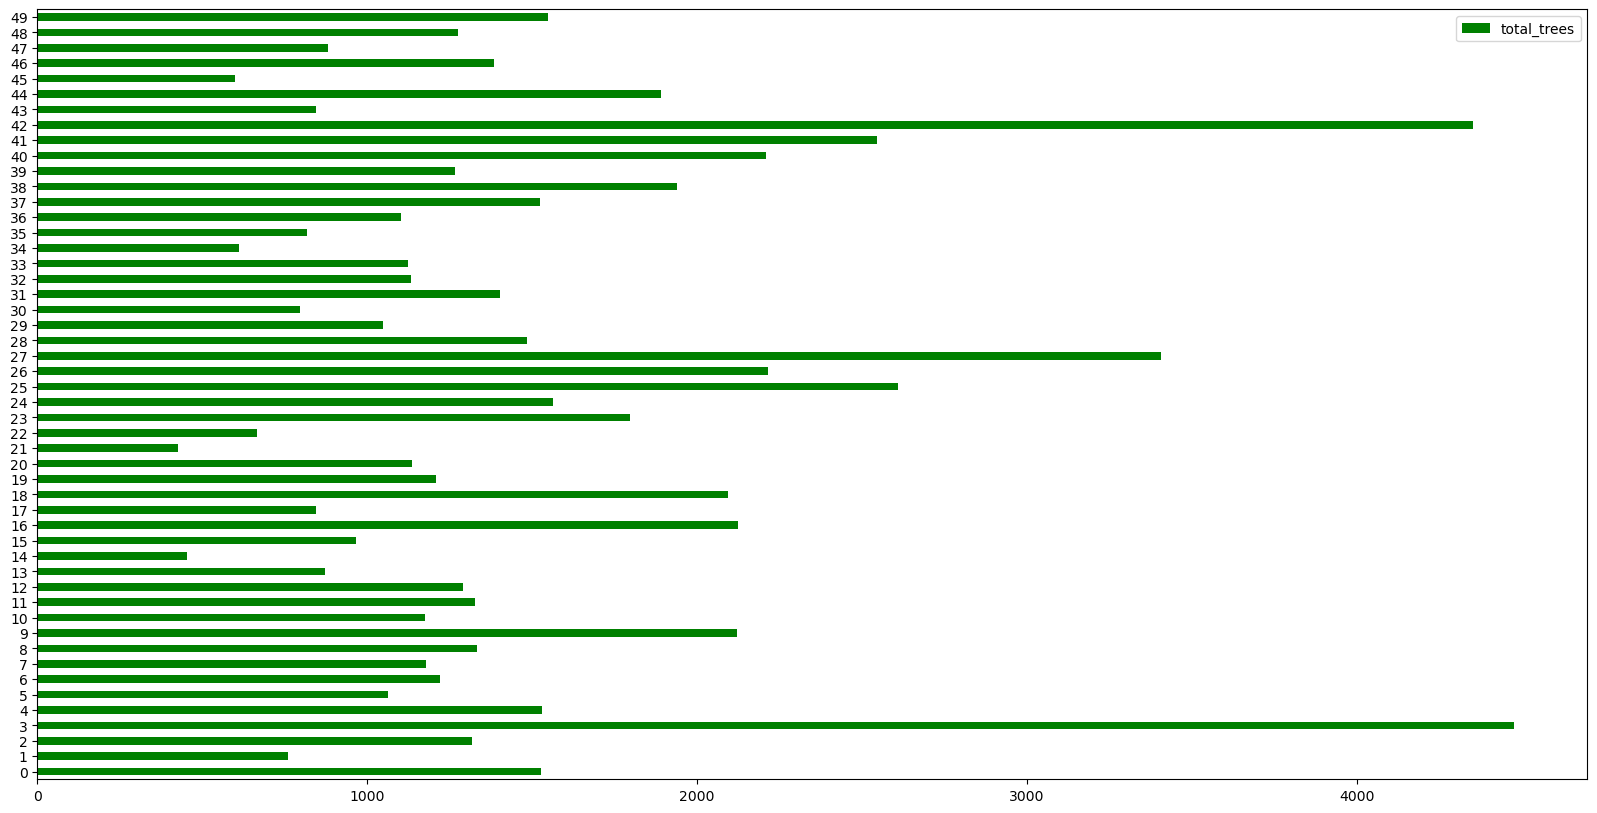

In [212]:
ward_trees[['total_trees']].plot.barh(stacked=True, figsize = (20,10), color = 'green')

<Axes: >

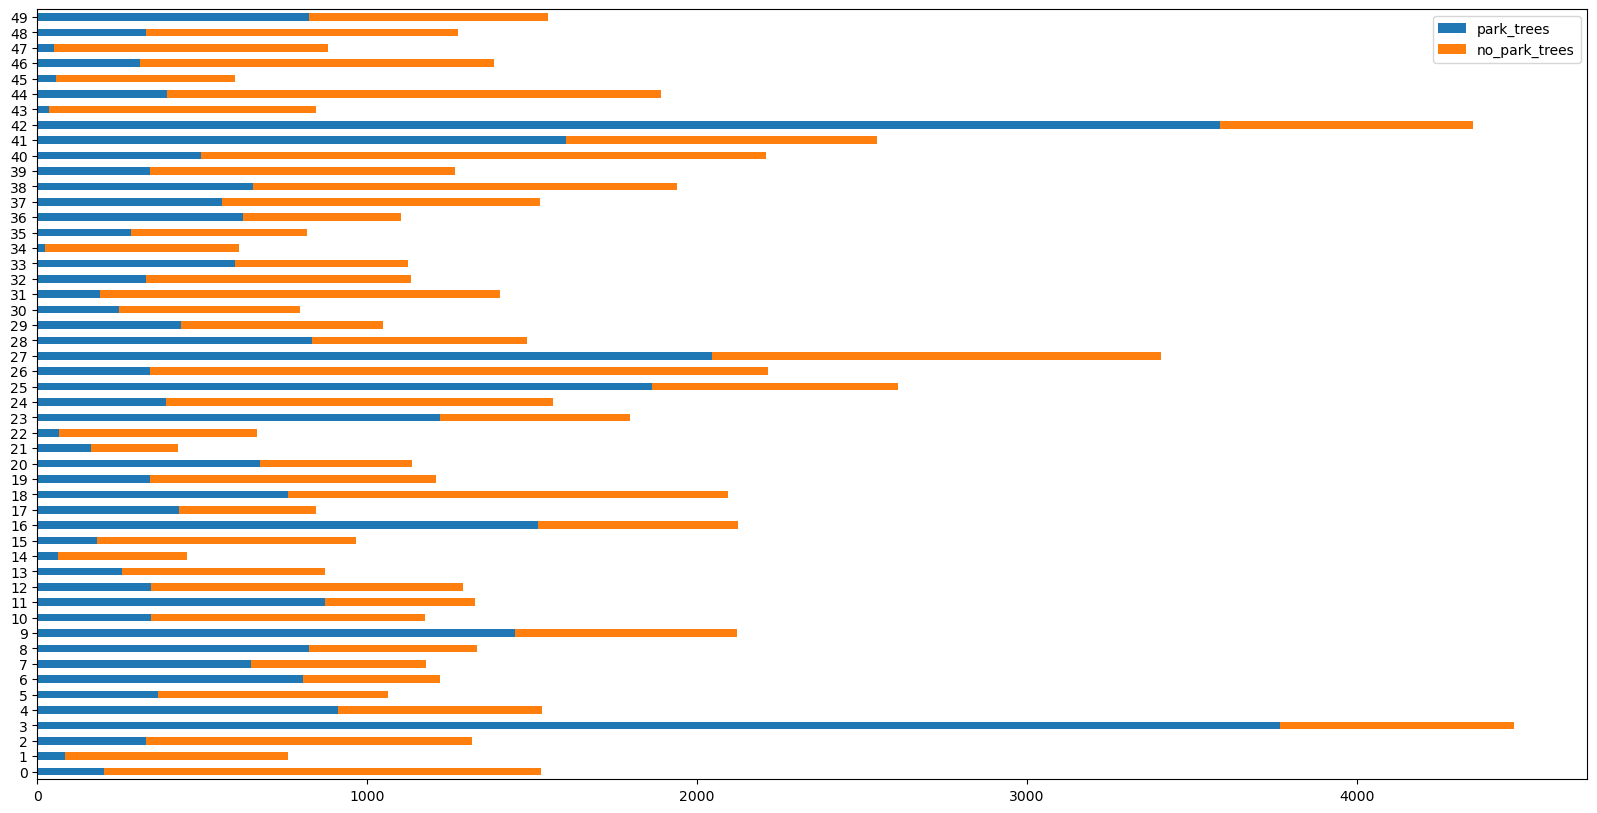

In [210]:
ward_trees[['park_trees', 'no_park_trees']].plot.barh(stacked=True, figsize = (20,10) )

<Axes: >

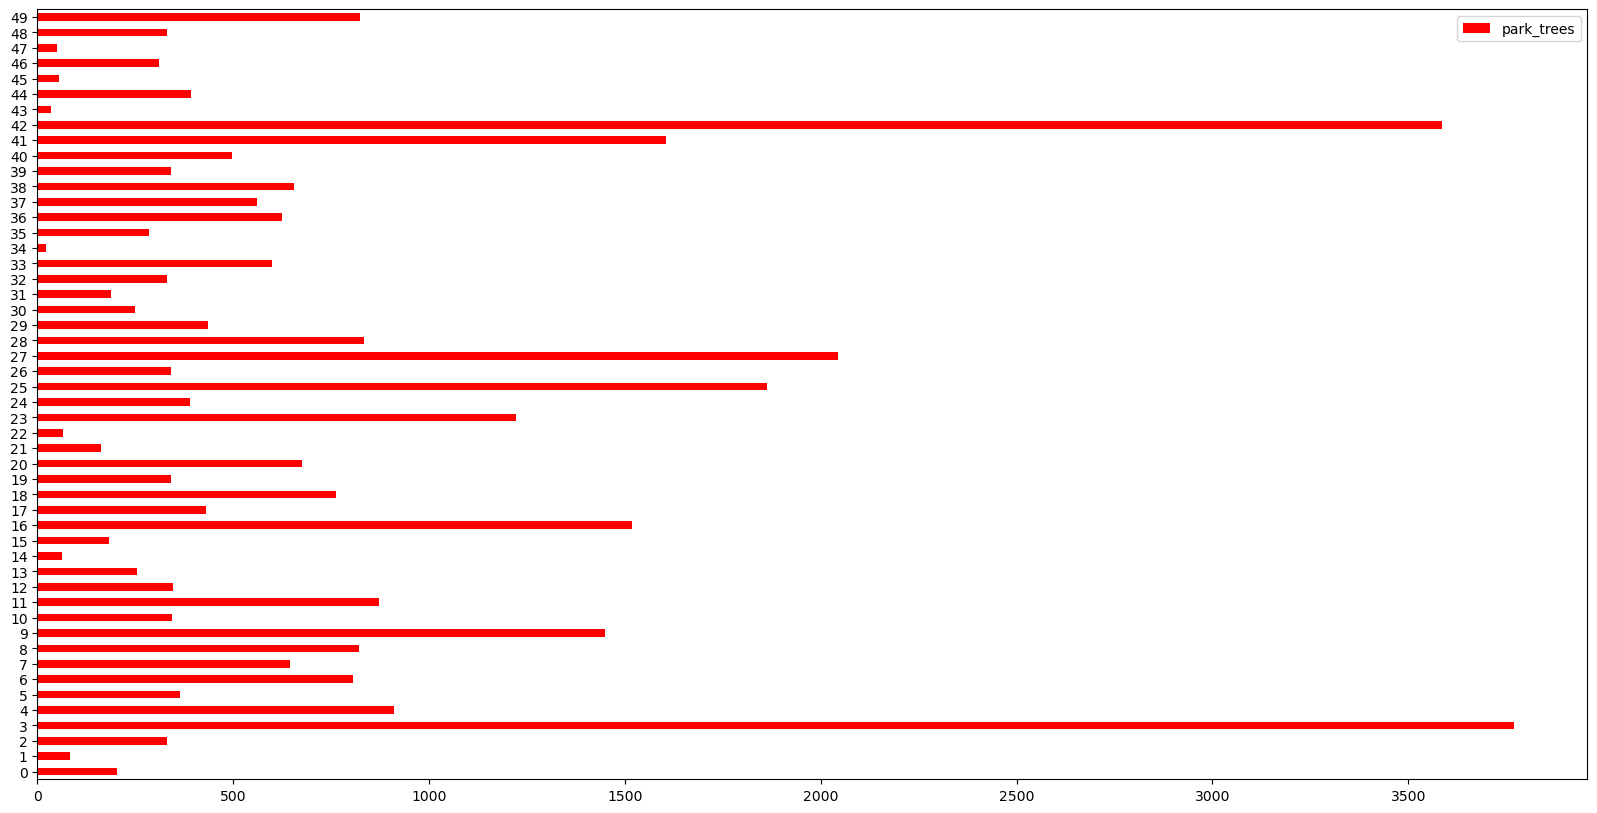

In [220]:
ward_trees[['park_trees']].plot.barh(stacked=True, figsize = (20,10), color = 'red' )